In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
from astropy.io import fits

In [14]:
from scipy.stats import gaussian_kde

In [3]:
cat0 = np.genfromtxt('../hercules/drcPhot18Mar/catDir_HERCULES/HERCULES_matchedDRCfilt0.dat',
                    names=True)
cat1 = np.genfromtxt('../hercules/drcPhot18Mar/catDir_HERCULES/HERCULES_matchedDRCfilt1.dat',
                    names=True)
cat2 = np.genfromtxt('../hercules/drcPhot18Mar/catDir_HERCULES/HERCULES_matchedDRCfilt2.dat',
                    names=True)
cat3 = np.genfromtxt('../hercules/drcPhot18Mar/catDir_HERCULES/HERCULES_matchedDRCfilt3.dat',
                    names=True)

In [4]:
hdu = fits.open('../hercules/tombrown_cat.fits')

In [5]:
l = hdu[1].data

In [6]:
# hdu[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               251520 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    6 /Number of columns in table                      
TFORM1  = '5240D   '           /                                                
TFORM2  = '5240D   '           /                                                
TFORM3  = '5240D   '           /                                                
TFORM4  = '5240D   '           /                                                
TFORM5  = '5240D   '        

In [11]:
ra = l[0][0]
dec = l[0][1]
f606w = l[0][2]
f606e = l[0][3]
f814w = l[0][4]
f814e = l[0][5]


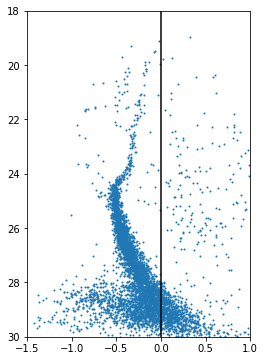

In [27]:
fig,ax = plt.subplots(figsize=(4,6))

ax.scatter(f606w-f814w,f606w,s=1)
ax.vlines(0,30,18)

ax.set_ylim(30,18)
ax.set_xlim(-1.5,1)
plt.show()

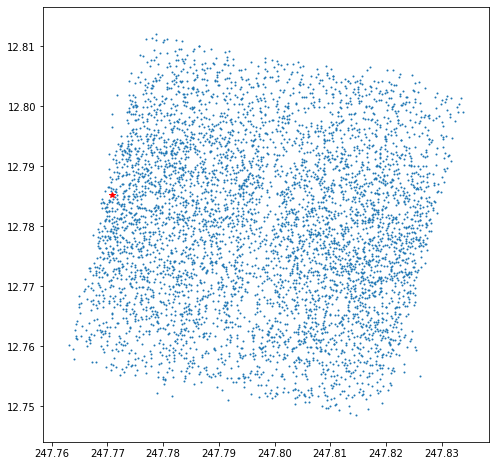

In [26]:
fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(RA,DEC,s=1)
plt.plot(ra0,dec0,marker='*',color='red')

plt.show()

In [9]:
ra0 = 247.7708333
dec0 = 12.7852778 

# 247.7708333    12.7852778 

In [12]:
x = np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ra-ra0))
y = np.sin(np.deg2rad(dec)) * np.cos(np.deg2rad(dec0)) \
    - np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(dec0)) * np.cos(np.deg2rad(ra-ra0))

# in degrees now 0.2255 arcsec/pixel
# 3600 arcseconds per degree

xpix = np.rad2deg(x) * (3600/0.03)
ypix = np.rad2deg(y) * (3600/0.03)

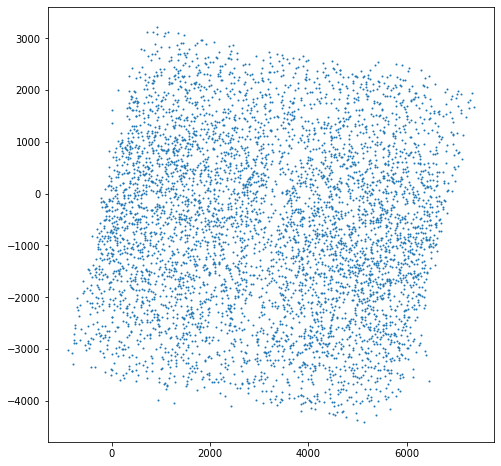

In [13]:
fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(xpix,ypix,s=1)

plt.show()

In [15]:
xy = np.vstack([xpix,ypix])
z = gaussian_kde(xy)(xy)

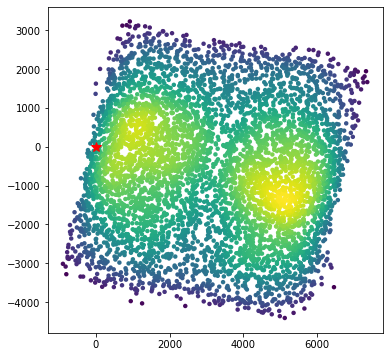

In [17]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xpix, ypix, c=z, s=20, edgecolor='')
ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
plt.show()


In [28]:
outArr = np.vstack((xpix,ypix,ra,dec,f606w,f814w,f606e,f814e))
print(outArr.shape)

(8, 5240)


In [30]:
np.savetxt('../hercules/hercTBxy.dat',outArr.T,header='x y ra dec F606W F814W err606 err814')